In [10]:
#Variance Threshold
import pandas as pd

data = pd.DataFrame({
    "age":[25,30,35,40,45],
    "salary":[5000,6000,7000,8000,9000],
    "country_code":[1,1,1,1,1]
})


In [2]:
data

,age,salary,country_code
0,25,5000,1
1,30,6000,1
2,35,7000,1
3,40,8000,1
4,45,9000,1


In [3]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.1)
selected_data=selector.fit_transform(data)
selected_features=data.columns[selector.get_support()]
print("Selected Features:",selected_features)

Selected Features: Index(['age', 'salary'], dtype='object')


In [4]:
df = pd.DataFrame({
     "age":[25,30,35,40,45],
     "bp":[120,130,140,150,160],
     "cholesterol_level":[110,120,130,140,150],
     "gender":["male","female","male","female","male"],
     "country_code":[1,1,1,1,1],
     "hosp_id":[3,3,3,3,3],
     "mv":["v2.1","v2.1","v2.2","v2.1","v2.1"]
})

In [6]:
df

,age,bp,cholesterol_level,gender,country_code,hosp_id,mv
0,25,120,110,male,1,3,v2.1
1,30,130,120,female,1,3,v2.1
2,35,140,130,male,1,3,v2.2
3,40,150,140,female,1,3,v2.1
4,45,160,150,male,1,3,v2.1


In [11]:
# from sklearn.feature_selection import VarianceThreshold
# selector = VarianceThreshold(threshold=0.1)
# selected_data=selector.fit_transform(df)
# selected_features=df.columns[selector.get_support()]
# print("Selected Features:",selected_features)

In [9]:
numeric_df = df.select_dtypes(include=['number'])

selector = VarianceThreshold(threshold=0.1)
selected_data = selector.fit_transform(numeric_df)

selected_features = numeric_df.columns[selector.get_support()]
print(selected_features)


Index(['age', 'bp', 'cholesterol_level'], dtype='object')


#Correlation coefficient

In [12]:
import numpy as np
data = pd.DataFrame({
    "size_sqft":[1000,1500,2000,2500,3000],
    "titles_count":[100,150,200,250,300],
    "price":[2000000,3000000,4000000,5000000,6000000],
})

In [13]:
data

,size_sqft,titles_count,price
0,1000,100,2000000
1,1500,150,3000000
2,2000,200,4000000
3,2500,250,5000000
4,3000,300,6000000


In [14]:
correlation_matrix = data.corr()
print(correlation_matrix)

              size_sqft  titles_count  price
size_sqft           1.0           1.0    1.0
titles_count        1.0           1.0    1.0
price               1.0           1.0    1.0


<Axes: >

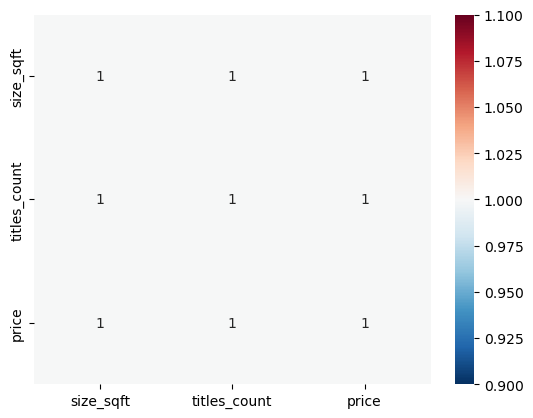

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(correlation_matrix,annot=True,cmap="RdBu_r")

In [16]:
#Removing highly correlated features(>0.9)

In [17]:
upper = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape),k=1).astype(bool)
)

to_drop = [column for column in upper.columns if any(upper[column]>0.9)]
print("Highly correlated features to drop.",to_drop)


Highly correlated features to drop. ['titles_count', 'price']


In [18]:
data = pd.DataFrame({
    "size_sqft":[1000,1500,2000,2500,3000],
    "tiles_count":[100,150,200,250,300],
    "bedroom_count":[2,3,1,6,2],
    "cost":[1000000,1500000,2000000,2500000,3000000],
    "price":[2000000,3000000,4000000,5000000,6000000],
})

In [19]:
correlation_matrix = data.corr()
print(correlation_matrix)

               size_sqft  tiles_count  bedroom_count      cost     price
size_sqft       1.000000     1.000000       0.246598  1.000000  1.000000
tiles_count     1.000000     1.000000       0.246598  1.000000  1.000000
bedroom_count   0.246598     0.246598       1.000000  0.246598  0.246598
cost            1.000000     1.000000       0.246598  1.000000  1.000000
price           1.000000     1.000000       0.246598  1.000000  1.000000


<Axes: >

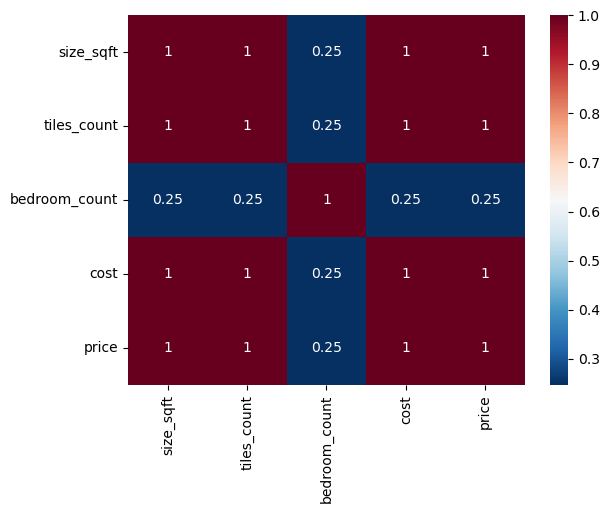

In [20]:

sns.heatmap(correlation_matrix,annot=True,cmap="RdBu_r")


In [21]:
upper = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape),k=1).astype(bool)
)

to_drop = [column for column in upper.columns if any(upper[column]>0.9)]
print("Highly correlated features to drop.",to_drop)


Highly correlated features to drop. ['tiles_count', 'cost', 'price']


In [22]:
x = pd.DataFrame({
    "gender":[0,1,0,1,1],
    "married":[1,1,0,0,1],
    "income":[20000,40000,50000,60000,70000]
})
y = [0,1,1,0,1]

In [23]:
x

,gender,married,income
0,0,1,20000
1,1,1,40000
2,0,0,50000
3,1,0,60000
4,1,1,70000


In [25]:
from sklearn.feature_selection import chi2,SelectKBest
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()
x_scaled = scalar.fit_transform(x)

selector = SelectKBest(score_func=chi2,k=2)
x_new = selector.fit_transform(x_scaled,y)

selected_features=x.columns[selector.get_support()]
print("Selected Features:",selected_features)

Selected Features: Index(['married', 'income'], dtype='object')


In [26]:
# Scenario: Loan Approval Classification
# You are building a classification model to predict whether a loan will be approved.
# Dataset features:
# Gender (Male/Female)
# Marital Status (Yes/No)
# Education Level (Graduate/Non-Graduate)
# Applicant Income
# Property Area (Urban/Rural)
# Favorite Color
# Loan Status (Approved/Rejected)
# You want to identify which categorical features significantly influence loan approval.
# ❓ Question:
# Which filter method is most appropriate here?
# Which type of features can be tested using this method?
# If “Favorite Color” has a very low chi-square score, what does it indicate?
# Why is chi-square suitable only for classification problems?

In [27]:
x = pd.DataFrame({
    "gender":[0,1,0,1,1],
    "married":[1,1,0,0,1],
    "income":[20000,40000,50000,60000,70000],
    "education":[1,0,0,1,1],
    "property_area":[1,0,1,0,1] , #urban,rural
    "fav_color":["blue","yellow","white","black","red"]
})
y = [0,1,0,0,1]

In [31]:

# ----- keep only numeric columns -----
x_numeric = x.select_dtypes(include=['number'])

# ----- scale -----
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_numeric)

# ----- feature selection -----
selector = SelectKBest(score_func=chi2, k=2)
x_new = selector.fit_transform(x_scaled, y)

selected_features = x_numeric.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['gender', 'married'], dtype='object')


In [30]:
x

,gender,married,income,education,property_area,fav_color
0,0,1,20000,1,1,blue
1,1,1,40000,0,0,yellow
2,0,0,50000,0,1,white
3,1,0,60000,1,0,black
4,1,1,70000,1,1,red
